In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [6]:
dfTrip = pd.read_excel('C:\\Users\\HP 840\\Desktop\\New folder\\Analysis & Insights - Flight prices.xlsx', sheet_name='Trip data (live)')
dfTrip = dfTrip.dropna(how='all')
print('Sheet Imported')

Sheet Imported


In [11]:
df = pd.read_excel('C:\\Users\\HP 840\\Desktop\\New folder\\Analysis & Insights - Flight prices.xlsx', sheet_name='Daily flight prices (live)')
df = df.dropna(how='all')
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
print('Sheet Imported')

Sheet Imported


Enter Origin in this format "AUCKLAND (AKL)"
SYDNEY (SYD)
Enter Destination in this format "AUCKLAND (AKL)"
AUCKLAND (AKL)
Enter Departure date in this format "2018-12-31"
2018-12


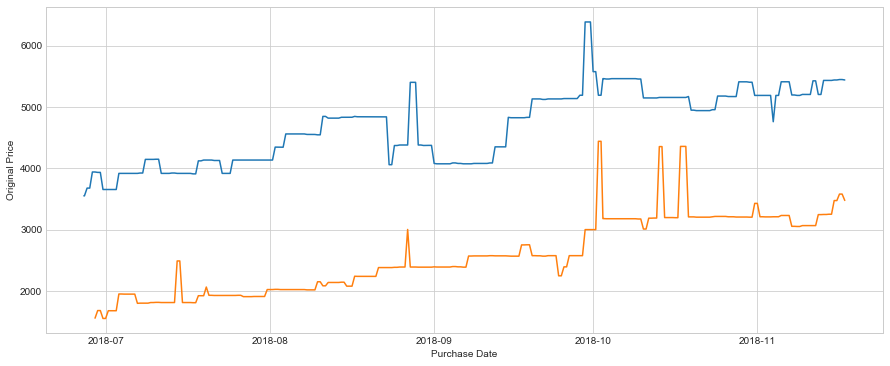

In [78]:
origin = input('Enter Origin in this format "AUCKLAND (AKL)"\n')
destination = input('Enter Destination in this format "AUCKLAND (AKL)"\n')
departure_date = input('Enter Departure date in this format "2018-12-31"\n')
dfTrip['DateStr'] = dfTrip['Departing'].dt.strftime('%Y-%m-%d')    #converting time to string so it can be compared as strings
df_plot = dfTrip.loc[(dfTrip['Origin'] == origin) & (dfTrip['Destination'] == destination) & (dfTrip['DateStr'].str.contains(departure_date))]
del dfTrip['DateStr'] #we created this row to compare date and no use of it
CIF_ID  = df_plot['CIF ID']
cif_id = list(CIF_ID)
x_axis = []
y_axis = []
for loop in cif_id:
    df.dropna(how='all', inplace = True)
    df_Graph = df[pd.to_numeric(df[loop], errors='coerce').notnull()]
    df_Graph = df_Graph[loop]
    x_axis.append(df_Graph.index)
    y_axis.append(df_Graph.values)
    string = 'plt.plot('
for index in range(len(x_axis)):
    string += 'x_axis[%s],y_axis[%s],'%(index,index)
string = string[:-1]
string = string+')'
plt.figure(figsize=(15,6))
exec(string)
plt.ylabel('Original Price')
plt.xlabel('Purchase Date')
plt.show()

